# Futile Stock Price Prediction with LSTM and GRU

This project predicts stock prices based on historical financial data using RNN LSTM.  It is a good practice of LSTM but does absolutely nothing for financial speculation as I believe stock prices follow a random walk process.


In [8]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


After you upgraded pandas and pandas-datareader, restart runtime before excuting the following codes.

In [9]:
import yfinance as yf
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Get the stock quote
df = yf.download('PFE', start='2010-01-01', end='2023-02-20')
print(df.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2010-01-04  17.333965  17.969639  17.305504  17.960152  11.026818  54898644
2010-01-05  17.950665  17.960152  17.599621  17.703985  10.869543  45714931
2010-01-06  17.703985  17.846300  17.561670  17.647058  10.834594  43640975
2010-01-07  17.685009  17.713472  17.514231  17.580645  10.793820  41557112
2010-01-08  17.666035  17.751423  17.571157  17.722960  10.881192  32049716


In [10]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import yfinance as yf

# Get the stock quote
df = yf.download('PFE', start='2010-01-01', end='2023-02-20')
print(df.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2010-01-04  17.333965  17.969639  17.305504  17.960152  11.026818  54898644
2010-01-05  17.950665  17.960152  17.599621  17.703985  10.869543  45714931
2010-01-06  17.703985  17.846300  17.561670  17.647058  10.834594  43640975
2010-01-07  17.685009  17.713472  17.514231  17.580645  10.793820  41557112
2010-01-08  17.666035  17.751423  17.571157  17.722960  10.881192  32049716


(3305, 6)


<function matplotlib.pyplot.show(close=None, block=None)>

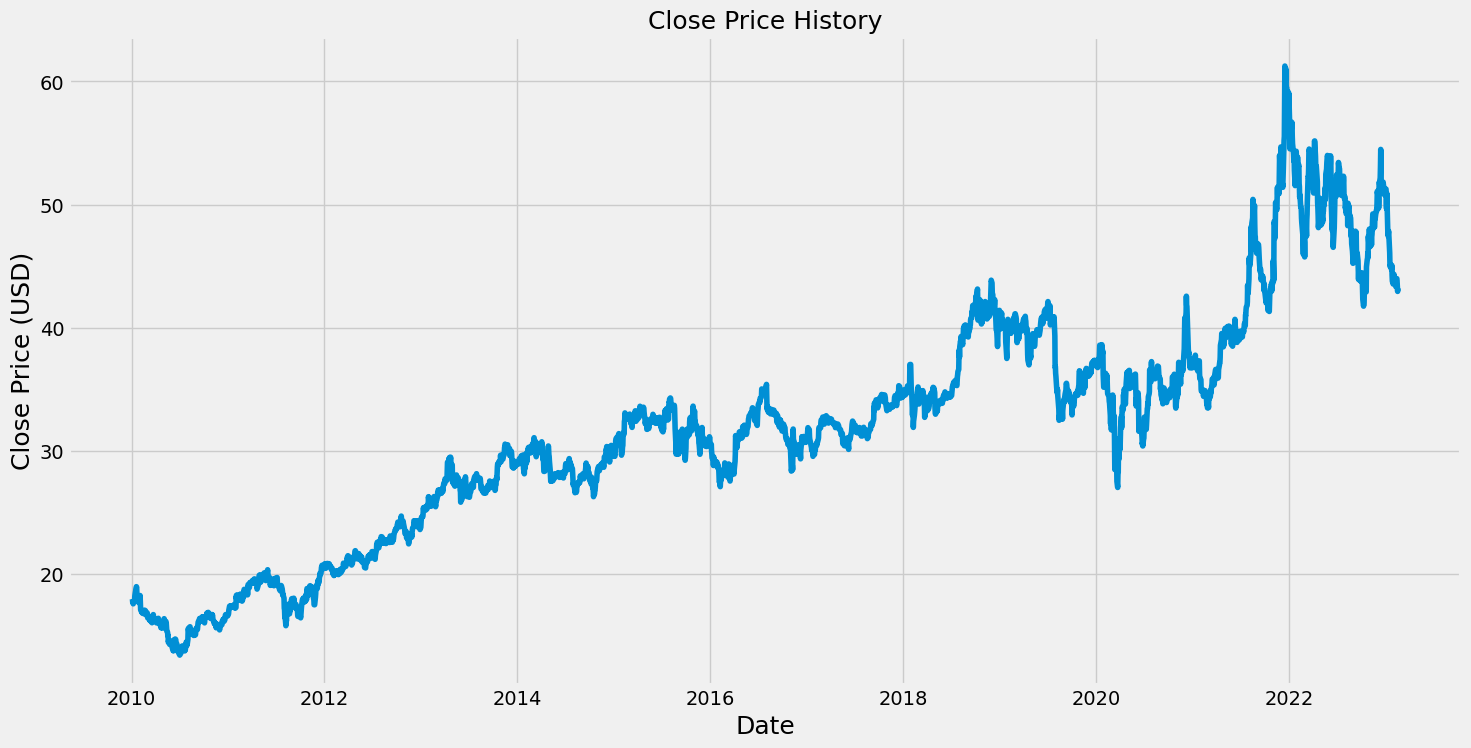

In [12]:
# Get the number of rows and columns in the data set
print(df.shape)
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title('Close Price History', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.show

In [13]:
# Create a new dataframe with only the Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
print(training_data_len)

2644


In [14]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(len(scaled_data))
print(scaled_data)

3305
[[0.09500669]
 [0.08965142]
 [0.08846134]
 ...
 [0.62516546]
 [0.61743047]
 [0.62286585]]


In [15]:
# Create the training dataset
# Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

sequence_len = 80

for i in range(sequence_len, len(train_data)):
  x_train.append(train_data[i-sequence_len:i, 0])
  y_train.append(train_data[i, 0])
  if i<=sequence_len+1:
    print(x_train)
    print(y_train)
    print()

[array([0.09500669, 0.08965142, 0.08846134, 0.08707293, 0.09004809,
       0.09302324, 0.0918332 , 0.1005603 , 0.10393216, 0.10611394,
       0.11622949, 0.11503941, 0.10115534, 0.09560173, 0.09341995,
       0.09203154, 0.0963951 , 0.08905638, 0.08965142, 0.09222987,
       0.10115534, 0.08885805, 0.07715576, 0.07576735, 0.07338723,
       0.0741806 , 0.07140378, 0.07398223, 0.07259386, 0.07100707,
       0.07001537, 0.07120545, 0.07636238, 0.07556901, 0.07001537,
       0.07279219, 0.07041207, 0.06763525, 0.07160211, 0.06862696,
       0.06307335, 0.06327168, 0.06624684, 0.06366839, 0.06128823,
       0.05970149, 0.06247831, 0.05831308, 0.06188327, 0.06188327,
       0.06089157, 0.06128823, 0.05494126, 0.05970149, 0.06743688,
       0.06882533, 0.06446172, 0.05950316, 0.06227998, 0.06188327,
       0.05970149, 0.05831308, 0.05474292, 0.05593296, 0.05811474,
       0.05950316, 0.06168494, 0.06247831, 0.06029653, 0.05811474,
       0.056528  , 0.05275945, 0.05256112, 0.05196608, 0.0487

In [16]:
type(x_train)

list

In [17]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
display(type(x_train))
display(x_train.shape)

# Reshape the data for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
display(x_train.shape[1])

numpy.ndarray

(2564, 80)

80

**Long Short Term Memory (LSTM) Network**

<!-- ![alt text](http://colah.github.io/images/post-covers/lstm.png) -->
![alt text](https://www.researchgate.net/profile/Savvas-Varsamopoulos/publication/329362532/figure/fig5/AS:699592479870977@1543807253596/Structure-of-the-LSTM-cell-and-equations-that-describe-the-gates-of-an-LSTM-cell.jpg)


**Gated Recurrent Unit (GRU)**

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Gated_Recurrent_Unit%2C_base_type.svg/2880px-Gated_Recurrent_Unit%2C_base_type.svg.png)

Initially, for $t=0$, the output vector is $h_{0}=0$.

\begin{aligned}z_{t}&=\sigma _{g}(W_{z}x_{t}+U_{z}h_{t-1}+b_{z})\\r_{t}&=\sigma _{g}(W_{r}x_{t}+U_{r}h_{t-1}+b_{r})\\{\hat {h}}_{t}&=\phi _{h}(W_{h}x_{t}+U_{h}(r_{t}\odot h_{t-1})+b_{h})\\h_{t}&=(1-z_{t})\odot h_{t-1}+z_{t}\odot {\hat {h}}_{t}\end{aligned}

where, the operator $\odot$  denotes the Hadamard product.

Variables
- $x_{t}$: input vector
- $h_{t}$: output vector
- $\hat{h}_{t}$: candidate activation vector
- $z_{t}$: update gate vector
- $r_{t}$: reset gate vector
- $W$, $U$ and $b$: parameter matrices and vector


Activation functions
- $\sigma _{g}$: The original is a sigmoid function.
- $\phi _{h}$: The original is a hyperbolic tangent.



In [18]:
# Build the LSTM and GRU model
model = Sequential()
model.add(LSTM(80, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(GRU(80, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 80, 80)            26240     
                                                                 
 gru (GRU)                   (None, 80)                38880     
                                                                 
 dense (Dense)               (None, 25)                2025      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 67,171
Trainable params: 67,171
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
2564/2564 [==============================] - 133s 49ms/step - loss: 6.3982e-04
Epoch 2/10
2564/2564 [==============================] - 118s 46ms/step - loss: 2.5013e-04
Epoch 3/10
2564/2564 [==============================] - 115s 45ms/step - loss: 2.0639e-04
Epoch 4/10
2564/2564 [==============================] - 114s 45ms/step - loss: 1.9679e-04
Epoch 5/10
2564/2564 [==============================] - 115s 45ms/step - loss: 1.7143e-04
Epoch 6/10
2564/2564 [==============================] - 115s 45ms/step - loss: 1.4721e-04
Epoch 7/10
2564/2564 [==============================] - 114s 44ms/step - loss: 1.5875e-04
Epoch 8/10
2564/2564 [==============================] - 115s 45ms/step - loss: 1.3905e-04
Epoch 9/10
2564/2564 [==============================] - 114s 45ms/step - loss: 1.2778e-04
Epoch 10/10
2564/2564 [==============================] - 114s 45ms/step - loss: 1.2434e-04


In [22]:
# Create the testing data set
# Create a new array containing scaled values indexed from (training_data_len - sequence_len) to the end.
test_data = scaled_data[training_data_len - sequence_len:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(sequence_len, len(test_data)):
  x_test.append(test_data[i-sequence_len:i, 0])

In [23]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [24]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [25]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

21/21 [==============================] - 2s 31ms/step


In [26]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)

0.30688950081275557


<ipython-input-27-06787f47ce3d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


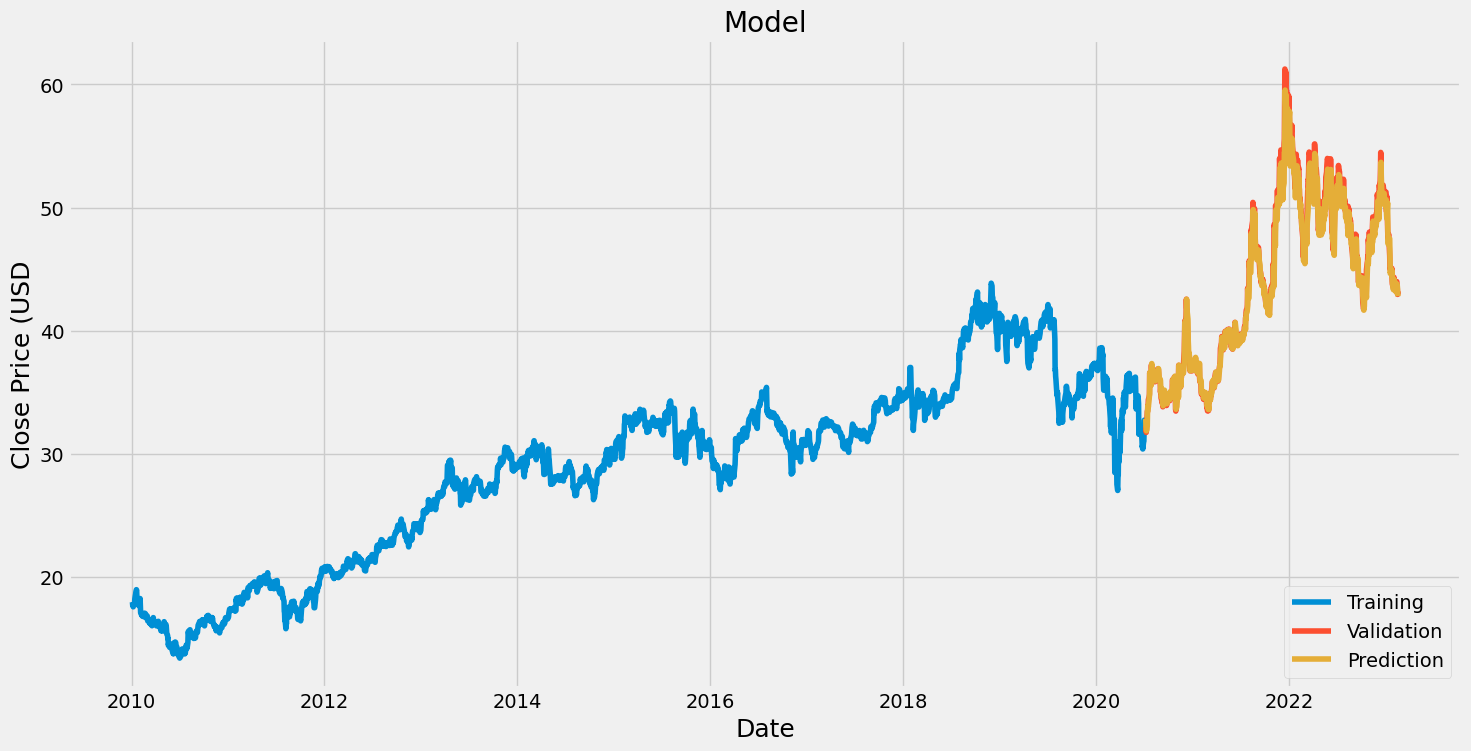

In [27]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visulize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Training', 'Validation', 'Prediction'], loc='lower right')
plt.show()

In [28]:
# Show the valid and predicted prices
print(valid)

                Close  Predictions
Date                              
2020-07-07  32.286530    32.832668
2020-07-08  32.020874    32.305908
2020-07-09  31.745731    32.100010
2020-07-10  32.096775    31.869867
2020-07-13  33.406071    32.267937
...               ...          ...
2023-02-13  43.990002    43.738087
2023-02-14  43.720001    43.778095
2023-02-15  43.320000    43.582554
2023-02-16  42.950001    43.086372
2023-02-17  43.209999    42.797703

[661 rows x 2 columns]


In [29]:
# Get the quote
# test_quote = web.DataReader('PFE', data_source='yahoo', start='2010-01-01', end='2021-10-20')
test_quote = yf.download('PFE', start='2010-01-01', end='2023-02-20')

# Create a new dataframe
new_df = test_quote.filter(['Close'])
# Get the last 80 day closing price values and convert the dataframe to an array


last_80_days = new_df[-80:].values
# Scale the data to be values between 0 and 1
last_80_days_scaled = scaler.transform(last_80_days)
# Create an empty list
X_test = []
# Append the past 80 days
X_test.append(last_80_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Inverse scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 35ms/step
[[43.079582]]


In [30]:
# test_quote2 = web.DataReader('PFE', data_source='yahoo', start='2021-09-30', end='2021-10-21')
test_quote2 = yf.download('PFE', start='2010-01-01', end='2023-02-20')

print(test_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2010-01-04    17.960152
2010-01-05    17.703985
2010-01-06    17.647058
2010-01-07    17.580645
2010-01-08    17.722960
                ...    
2023-02-13    43.990002
2023-02-14    43.720001
2023-02-15    43.320000
2023-02-16    42.950001
2023-02-17    43.209999
Name: Close, Length: 3305, dtype: float64
